In [0]:
import pandas as pd
import numpy as np

In [0]:
df = pd.read_csv('/Volumes/workspace/default/netflix/netflix_titles_cleaned_file.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International Tv Shows, Tv Dramas, Tv Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime Tv Shows, International Tv Shows, Tv Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality Tv","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International Tv Shows, Romantic Tv Shows, Tv ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8786,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' Tv, Korean Tv Shows, Tv Comedies","While living alone in a spooky town, a young g..."
8787,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8788,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [0]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [0]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [0]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [0]:
import matplotlib.pyplot as plt

# Extract year from 'date_added'
df['year_added'] = df['date_added'].dt.year

# Group by year and count number of titles added each year
content_growth = df.groupby('year_added').size().reset_index(name='count')

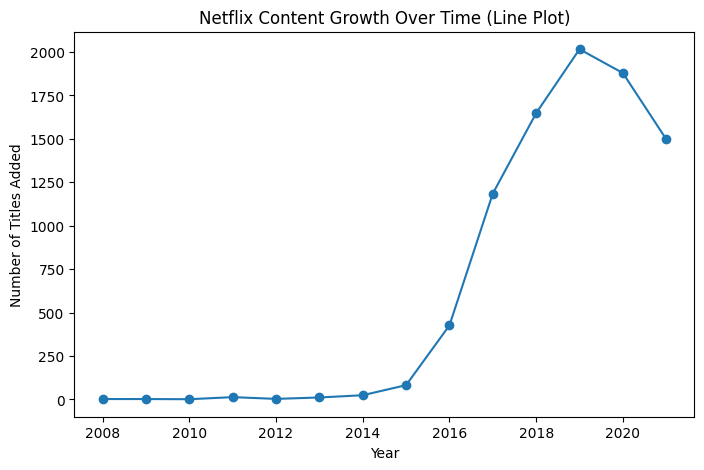

In [0]:
# Plot line plot
plt.figure(figsize=(8, 5))
plt.plot(content_growth['year_added'], content_growth['count'], marker='o')
plt.title('Netflix Content Growth Over Time (Line Plot)')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.show()

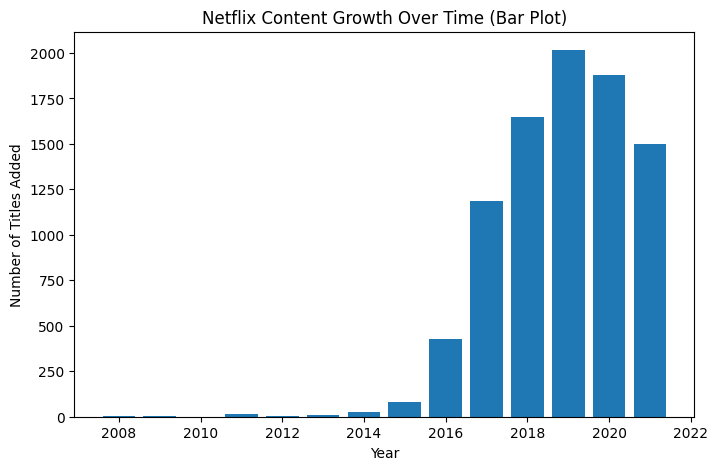

In [0]:
# Plot bar plot
plt.figure(figsize=(8, 5))
plt.bar(content_growth['year_added'], content_growth['count'])
plt.title('Netflix Content Growth Over Time (Bar Plot)')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.show()

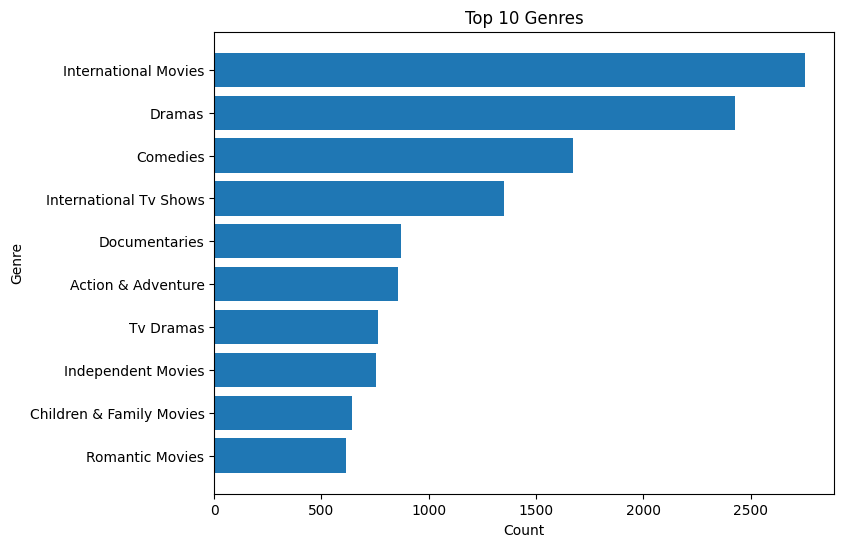

In [0]:
# Genre Distribution (most common categories)
genre_counts = df['listed_in'].str.split(',').explode().str.strip().value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

plt.figure(figsize=(8, 6))
plt.barh(genre_counts['Genre'][:10][::-1], genre_counts['Count'][:10][::-1])
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

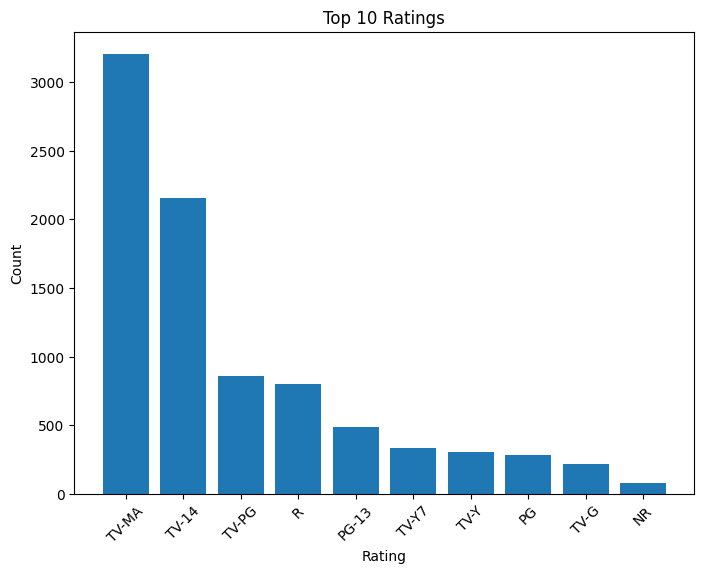

In [0]:
# Ratings Distribution
rating_counts = df['rating'].value_counts().reset_index()
rating_counts.columns = ['Rating', 'Count']

plt.figure(figsize=(8, 6))
plt.bar(rating_counts['Rating'][:10], rating_counts['Count'][:10])
plt.title('Top 10 Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

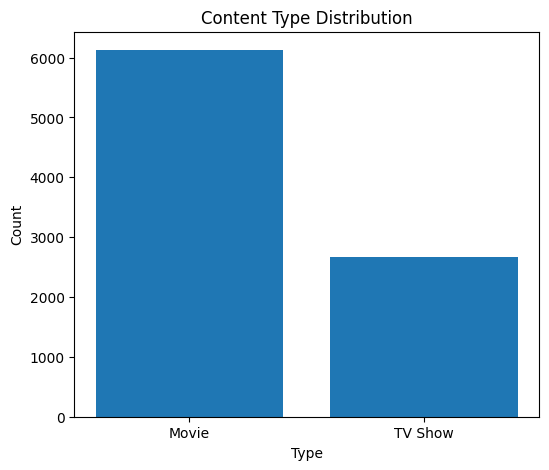

In [0]:
# Content Type Distribution
type_counts = df['type'].value_counts().reset_index()
type_counts.columns = ['Type', 'Count']

plt.figure(figsize=(6, 5))
plt.bar(type_counts['Type'], type_counts['Count'])
plt.title('Content Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

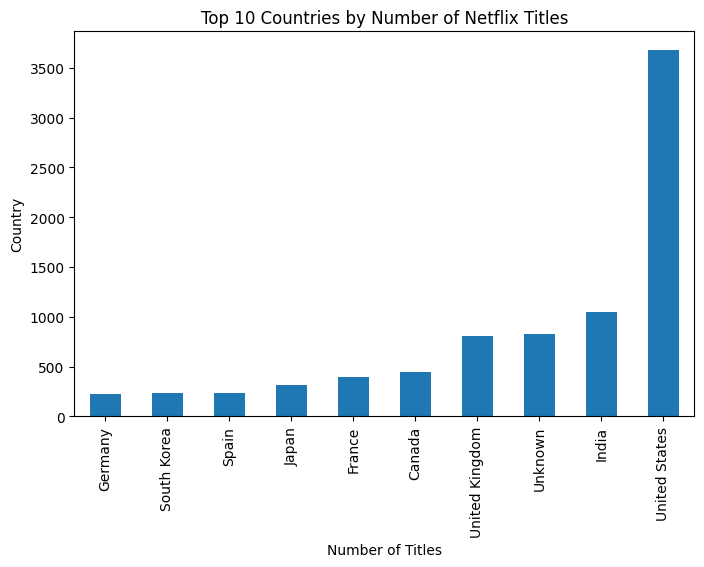

In [0]:
# Country-Level Analysis: Top contributing countries to Netflix

# Count titles per country
country_counts = df['country'].dropna().str.split(',').explode().str.strip().value_counts().head(10)

# Bar chart: Top 10 countries
country_counts[::-1].plot(kind='bar', figsize=(8, 5), title='Top 10 Countries by Number of Netflix Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()